## Notebook for plotting deployed performance of Chemprop

**Created on 21st December, 2022; modified on 24th February, 2024**

In [1]:
# import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
%%bash
pwd
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/other-manuscript-plots
total 2544
-rw-------@ 1 riteshk  staff   84364 Feb 13 14:20 compare-md-ml-expt-cond.ipynb
-rw-r--r--@ 1 riteshk  staff   87316 Feb 23 05:13 bar_ml_comparison_cond_022324.eps
-rw-------@ 1 riteshk  staff  162976 Feb 23 05:13 summary_all_models_cond.ipynb
-rw-r--r--@ 1 riteshk  staff   87322 Feb 23 05:13 bar_ml_comparison_ce_022324.eps
-rw-------@ 1 riteshk  staff  152078 Feb 23 05:13 summary_all_models_ce.ipynb
-rw-r--r--@ 1 riteshk  staff   85812 Feb 23 09:29 bar_ml_comparison_oxstab_022324.eps


-rw-------@ 1 riteshk  staff  145949 Feb 23 10:20 summary_all_models_oxstab.ipynb
-rw-------@ 1 riteshk  staff     582 Feb 23 11:23 literature_ml_performance.csv
-rw-r--r--@ 1 riteshk  staff   23315 Feb 23 11:24 literature_ml_performance_022324.eps
-rw-------@ 1 riteshk  staff  375462 Feb 23 11:24 compare_literature_ML_performance.ipynb
-rw-------@ 1 riteshk  staff     417 Feb 23 12:02 oxstab_expt_valid_mp_level_thf.csv
-rw-------@ 1 riteshk  staff   74263 Feb 24 11:50 plot_fig3h_calc_activation_energy.ipynb


In [3]:
path = '/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/ionic-conductivity_2.1/dataset_v2.0/common-log-output/cdf-stratified-split-2-cv_2/deploy/final-ood-int-lit/' ## path for ionic conductivity model (Chemprop with RDKit features on strat-II split)

In [4]:
df_pred = pd.read_csv(path + 'preds_cond_ood_final_cdf_rd_strat2_cv_comm_s800_e3.csv')
df_pred

,solv_comb_sm,salt_sm,true_conductivity_log,class,group,conductivity_log,conductivity_log_ensemble_uncal_var
0,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.333390,Ether,in-house,0.397668,0.003130
1,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.297290,Ether,in-house,0.345643,0.003022
2,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.254010,Ether,in-house,0.285295,0.002885
3,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.202220,Ether,in-house,0.215715,0.002844
4,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.137990,Ether,in-house,0.135815,0.002826
...,...,...,...,...,...,...,...
166,CS(=O)(=O)OCC(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.503791,Others,literature,0.048418,0.015965
167,CS(=O)(=O)OCC(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.474216,Others,literature,0.019113,0.015392
168,CO[Si](C)(CCC(F)(F)F)OC,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.585027,Others,literature,0.326589,0.006349
169,CO[Si](C)(CCC(F)(F)F)OC,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.356547,Others,literature,0.137253,0.051541


In [5]:
y_pred = df_pred['conductivity_log']
y_true = df_pred['true_conductivity_log']
y_pred_unc = df_pred['conductivity_log_ensemble_uncal_var']

In [6]:
df_true_add = pd.read_csv(path + 'cond_ood_final_add.csv')
df_true_add

,solv_ratio_1,solv_ratio_2,solv_ratio_3,solv_ratio_4,mol_wt_solv_1,mol_wt_solv_2,mol_wt_solv_3,mol_wt_solv_4,mol_wt_salt,conc_salt,temperature
0,1,0,0,0,270.069064,0,0,0,186.939685,1.0,80
1,1,0,0,0,270.069064,0,0,0,186.939685,1.0,70
2,1,0,0,0,270.069064,0,0,0,186.939685,1.0,60
3,1,0,0,0,270.069064,0,0,0,186.939685,1.0,50
4,1,0,0,0,270.069064,0,0,0,186.939685,1.0,40
...,...,...,...,...,...,...,...,...,...,...,...
166,1,0,0,0,177.991150,0,0,0,186.939685,1.2,25
167,1,0,0,0,177.991150,0,0,0,186.939685,1.0,25
168,1,0,0,0,202.063691,0,0,0,186.939685,1.0,25
169,1,0,0,0,202.063691,0,0,0,186.939685,3.0,25


**Activation energy for E3F1**

In [9]:
y_true = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCC(F)(F)F)(F)(F)F']['true_conductivity_log']
y_pred = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCC(F)(F)F)(F)(F)F']['conductivity_log']
y_pred_unc = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCC(F)(F)F)(F)(F)F']['conductivity_log_ensemble_uncal_var']
ind = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCC(F)(F)F)(F)(F)F'].index
x = df_true_add.iloc[ind]['temperature']
y_true = y_true.iloc[:7]
y_pred = y_pred.iloc[:7] ## taking only 1M data; ignoring others
y_pred_unc = y_pred_unc.iloc[:7]
y_true_unc = [0.03148,0.0297,0.02671,0.02505,0.02227,0.02061,0.01783] ## experimental uncertainty in common log scale
y_true_ = 10**y_true; y_true_ln = np.log(y_true_) ## natural log for activation energy calculation
y_pred_ = 10**y_pred; y_pred_ln = np.log(y_pred_) ## natural log for activation energy calculation
x = x.iloc[:7]
y_pred_ln

0    0.915664
1    0.795873
2    0.656915
3    0.496703
4    0.312725
5    0.096994
6   -0.155845
Name: conductivity_log, dtype: float64

In [10]:
## natural log for activation energy calculation
x_p = np.arange(2.83, 3.44, 0.1)
lr_fit_true = np.polyfit(1000/(x+273.15), y_true_ln, deg=1)
lr_fit_pred = np.polyfit(1000/(x+273.15), y_pred_ln, deg=1)
lr_fn_true = np.poly1d(lr_fit_true)
lr_fn_pred = np.poly1d(lr_fit_pred)
act_energy_true = -lr_fit_true[0] * 8.314
act_energy_pred = -lr_fit_pred[0] * 8.314
print("True activation energy: ", act_energy_true, "Predicted activation energy:, ", act_energy_pred)

True activation energy:  11.802229943514417 Predicted activation energy:,  15.326359930973664


In [11]:
## common log for plotting
lr_fit_true = np.polyfit(1000/(x+273.15), y_true, deg=1)
lr_fit_pred = np.polyfit(1000/(x+273.15), y_pred, deg=1)
lr_fn_true = np.poly1d(lr_fit_true)
lr_fn_pred = np.poly1d(lr_fit_pred)

In [13]:
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
anvil = (0.298, 0.78, 0.77) # 76, 199, 196

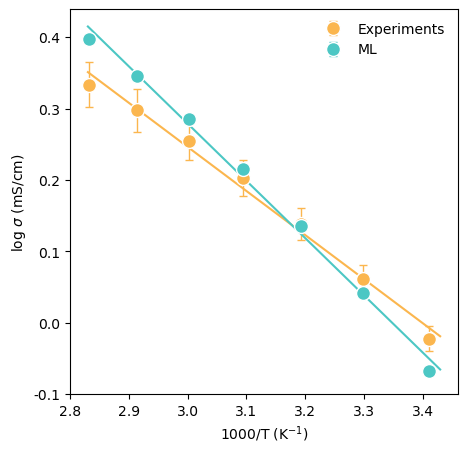

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.errorbar(1000/(x+273.15), y_true, label='Experiments', color=orange, yerr=y_true_unc, linewidth=0, marker='o', markersize=10, alpha=1, capsize=3, elinewidth=1, markeredgecolor='w')
ax.errorbar(1000/(x+273.15), y_pred, label='ML', color=anvil, yerr=y_pred_unc, linewidth=0, marker='o', markersize=10, alpha=1, capsize=3, elinewidth=1, markeredgecolor='w')
ax.plot(x_p, lr_fn_true(x_p), color=orange, linestyle='-')
ax.plot(x_p, lr_fn_pred(x_p), color=anvil, linestyle='-')
plt.ylabel('log $\sigma$ (mS/cm)')
plt.xlabel('1000/T (K$^{-1}$)')
ax.legend(frameon=False)
ax.set_yticks([-0.1, 0.0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels([-0.1, 0.0, 0.1, 0.2, 0.3, 0.4])
plt.savefig('fig3h.eps', dpi=300)